
# 01 – Autoencoders for Anomaly Detection

**Module:** Anomaly & Fraud Detection  
**Folder:** Ensemble and Advanced Methods

This notebook demonstrates **reconstruction-based anomaly detection using feedforward autoencoders**.


## Objective

Build a workflow that:
- Learns to reconstruct normal data
- Uses reconstruction error as anomaly score
- Flags high-error points as anomalies
- Integrates into anomaly detection pipelines


## Design Principles

✔ Unsupervised reconstruction-based detection  
✔ Works for multivariate numeric datasets  
✔ Threshold selection on reconstruction error  
✔ Pipeline-ready and production-friendly


## Imports and Setup



In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

np.random.seed(2010)

## Simulated Dataset

In [37]:
data_normal = np.random.normal(0, 1, size=(1000, 10))
data_anomalies = np.random.normal(5, 1, size=(10, 10))
data = np.vstack([data_normal, data_anomalies])
df = pd.DataFrame(data, columns=[f'feature_{i}' for i in range(data.shape[1])])

# Scale Data

In [40]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

## Build Autoencoder

In [43]:
input_dim = data_scaled.shape[1]
encoding_dim = 5

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='linear')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

## Train Autoencoder

In [46]:
autoencoder.fit(data_scaled, data_scaled,
                epochs=50,
                batch_size=32,
                shuffle=True,
                verbose=0)

## Compute Reconstruction Error

In [48]:
reconstructions = autoencoder.predict(data_scaled)
reconstruction_error = np.mean(np.square(data_scaled - reconstructions), axis=1)
df['reconstruction_error'] = reconstruction_error

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


## Thresholding

In [50]:
threshold = np.percentile(reconstruction_error, 95)  # flag top 5% errors
fitted_threshold = threshold
df['anomaly_flag'] = (df['reconstruction_error'] > fitted_threshold).astype(int)

## Summary

In [52]:
print(df['anomaly_flag'].value_counts())

anomaly_flag
0    959
1     51
Name: count, dtype: int64


## Visualization

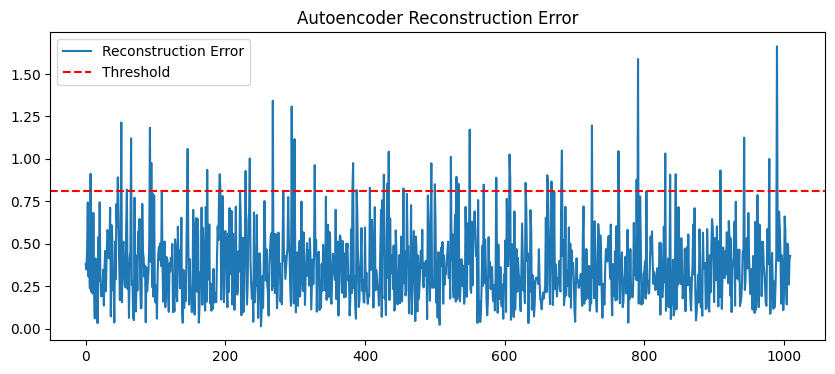

In [58]:
plt.figure(figsize=(10,4))
plt.plot(df['reconstruction_error'], label='Reconstruction Error')
plt.axhline(fitted_threshold, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.title('Autoencoder Reconstruction Error')
plt.show()


##  Integration Notes

- Autoencoder learns normal data distribution  
- Reconstruction error provides anomaly score  
- Threshold selection is critical for detecting rare events  
- Can be combined with other methods in ensemble pipelines


## Production Checklist

✔ Train only on normal/historical data  
✔ Scale new data consistently  
✔ Compute reconstruction error for anomaly scoring  
✔ Integrate flags into monitoring/alerting system


## Key Takeaways

- Autoencoders are effective for unsupervised anomaly detection  
- Works well for multivariate numeric datasets  
- Reconstruction error is interpretable and thresholdable


## Next Steps

- Extend to Variational Autoencoders (VAE)  
- Integrate into ensemble with Isolation Forest, LOF, and GMM  
- Monitor reconstruction error drift in production over time